<a href="https://colab.research.google.com/github/gwon0919/ML/blob/main/tfc16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras
import sys
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train),(x_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)  # (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
print(x_train[0])  # 0번째 feature
print(y_train[0])  # 0번째 label   9
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankel boot']
print(set(y_train))

x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255  # 정규화
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 21

In [3]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(rate=0.3),

    keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Dropout(rate=0.3),

    keras.layers.Flatten(),

    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(rate=0.2),

    keras.layers.Dense(units=32, activation='relu'),
    keras.layers.Dropout(rate=0.2),

    keras.layers.Dense(units=10, activation='softmax')
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

Epoch 1/500
750/750 - 9s - loss: 0.2182 - accuracy: 0.9209 - val_loss: 0.2174 - val_accuracy: 0.9222 - 9s/epoch - 12ms/step
Epoch 2/500
750/750 - 4s - loss: 0.2145 - accuracy: 0.9216 - val_loss: 0.2128 - val_accuracy: 0.9247 - 4s/epoch - 5ms/step
Epoch 3/500
750/750 - 4s - loss: 0.2124 - accuracy: 0.9213 - val_loss: 0.2134 - val_accuracy: 0.9237 - 4s/epoch - 6ms/step
Epoch 4/500
750/750 - 7s - loss: 0.2174 - accuracy: 0.9209 - val_loss: 0.2261 - val_accuracy: 0.9181 - 7s/epoch - 9ms/step
Epoch 5/500
750/750 - 6s - loss: 0.2130 - accuracy: 0.9212 - val_loss: 0.2210 - val_accuracy: 0.9216 - 6s/epoch - 8ms/step
Epoch 6/500
750/750 - 7s - loss: 0.2148 - accuracy: 0.9218 - val_loss: 0.2118 - val_accuracy: 0.9252 - 7s/epoch - 9ms/step
Epoch 7/500
750/750 - 5s - loss: 0.2153 - accuracy: 0.9213 - val_loss: 0.2092 - val_accuracy: 0.9258 - 5s/epoch - 6ms/step
Epoch 8/500
750/750 - 4s - loss: 0.2156 - accuracy: 0.9206 - val_loss: 0.2112 - val_accuracy: 0.9262 - 4s/epoch - 5ms/step
Epoch 9/500
750

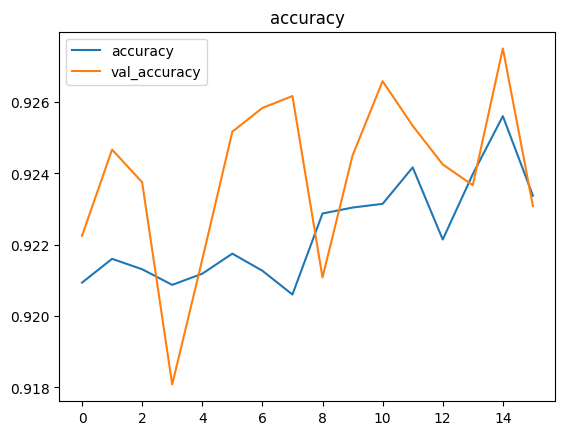

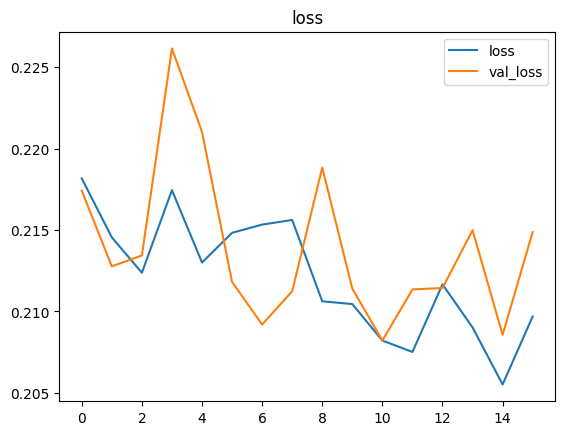

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # sparse_categorical_crossentropy XXX

from keras.callbacks import EarlyStopping, ModelCheckpoint
import os

es = EarlyStopping(monitor='val_loss', patience=5)  # 보통 10

history = model.fit(x_train, y_train, batch_size=64, epochs=500, verbose=2, validation_split=0.2, callbacks=[es])

print(history.history)
# 모델 평가
train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('train_loss, train_acc : ', train_loss, train_acc)
print('test_loss, test_acc : ', test_loss, test_acc)

history = history.history

# 시각화
import matplotlib.pyplot as plt

def plot_acc(title = None):
    plt.plot(history['accuracy'], label='accuracy')
    plt.plot(history['val_accuracy'], label='val_accuracy')
    plt.title(title)
    plt.legend()

plot_acc('accuracy')
plt.show()

def plot_loss(title = None):
    plt.plot(history['loss'], label='loss')
    plt.plot(history['val_loss'], label='val_loss')
    plt.title(title)
    plt.legend()

plot_loss('loss')
plt.show()

In [ ]:
# 참고 소스 : VGGNet style 네트워크

# dataset은 Fashion MNIST with CNN
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=64, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=128, padding='same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters=256, padding='valid', activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Dense(units=10, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Epoch 1/500
750/750 - 4s - loss: 0.2055 - accuracy: 0.9231 - val_loss: 0.2094 - val_accuracy: 0.9254 - 4s/epoch - 6ms/step
Epoch 2/500
750/750 - 3s - loss: 0.2012 - accuracy: 0.9251 - val_loss: 0.2148 - val_accuracy: 0.9244 - 3s/epoch - 4ms/step
Epoch 3/500
750/750 - 4s - loss: 0.2056 - accuracy: 0.9245 - val_loss: 0.2127 - val_accuracy: 0.9222 - 4s/epoch - 6ms/step
Epoch 4/500
750/750 - 5s - loss: 0.2029 - accuracy: 0.9254 - val_loss: 0.2191 - val_accuracy: 0.9243 - 5s/epoch - 7ms/step
Epoch 5/500
750/750 - 3s - loss: 0.2017 - accuracy: 0.9255 - val_loss: 0.2117 - val_accuracy: 0.9258 - 3s/epoch - 4ms/step
Epoch 6/500
750/750 - 3s - loss: 0.2055 - accuracy: 0.9252 - val_loss: 0.2092 - val_accuracy: 0.9266 - 3s/epoch - 4ms/step
Epoch 7/500
750/750 - 3s - loss: 0.2015 - accuracy: 0.9264 - val_loss: 0.2087 - val_accuracy: 0.9254 - 3s/epoch - 4ms/step
Epoch 8/500
750/750 - 4s - loss: 0.2002 - accuracy: 0.9266 - val_loss: 0.2091 - val_accuracy: 0.9260 - 4s/epoch - 6ms/step
Epoch 9/500
750/

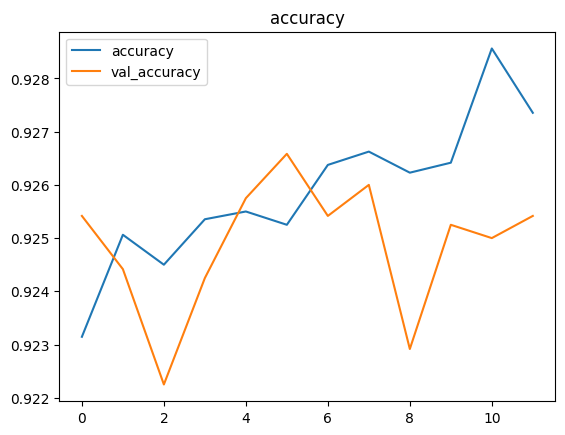

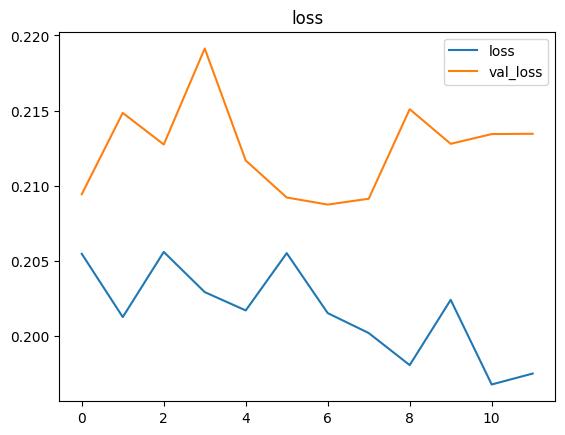

In [8]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=5)  # 보통 10

history = model.fit(x_train, y_train, batch_size=64, epochs=500, verbose=2, validation_split=0.2, callbacks=[es])

print(history.history)

# 모델 평가
train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('train_loss, train_acc : ', train_loss, train_acc)
print('test_loss, test_acc : ', test_loss, test_acc)

history = history.history

# 시각화
import matplotlib.pyplot as plt

def plot_acc(title = None):
    plt.plot(history['accuracy'], label='accuracy')
    plt.plot(history['val_accuracy'], label='val_accuracy')
    plt.title(title)
    plt.legend()

plot_acc('accuracy')
plt.show()

def plot_loss(title = None):
    plt.plot(history['loss'], label='loss')
    plt.plot(history['val_loss'], label='val_loss')
    plt.title(title)
    plt.legend()

plot_loss('loss')
plt.show()

In [9]:
!pip install --upgrade keras
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.1/997.1 kB 14.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.14.0
    Uninstalling keras-2.14.0:
      Successfully uninstalled keras-2.14.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.14.0 requires keras<2.15,>=2.14.0, but you have keras 3.0.0 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 81.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.14.0
    Uninstalling tensorflow-estimator-2.14.0:
      Successfully uninstalled tensorflow-estimator-2.14.0
  Attempting uninstall: keras
    Found existing installation: keras 3.0.0
    Uninstalling keras-3.0.0:
      Successfully uninstalled keras-3.0.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.14.1
    Uninstalling tensorboard-2.14.1:
      Successfully uninstalled tensorboard-2.14.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.14.0
    Uninstalling tensorflow-2.14.0:
      Successfully un

In [1]:
!pip install matplotlib-venn

In [2]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 120880 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.6.0-1ubuntu1_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.6.0-1ubuntu1) ...
Setting up libarchive-dev:amd64 (3.6.0-1ubuntu1) ...
Processing triggers for man-db (2.10.2-1) ...
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for libarchive
  Running setup.py clean for libarchive
Failed to build libarchive
ERROR: Could not build wheels for libarchive, which is required to install pyproject.toml-based projects


In [3]:
!apt-get -qq install -y graphviz && pip install pydo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.4/192.4 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.7/164.7 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.7/97.7 kB 12.6 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.22.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.8.0 which is incompatible.


In [4]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
pip install tensorflow==2.0.0

In [ ]:
!apt-get -qq install -y libfluidsynth1